In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from time import  time

from torchvision.utils import make_grid
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from bhsgan import DiscriminatorBhsMnist, GeneratorBhsMnist
from ipmbhsgan import DiscriminatorIpmMnist, GeneratorIpmMnist
from trainer import (Trainer, TrainingParams, get_dis_loss_bhs,
                     get_dis_loss_ipm, get_dis_loss_wasserstein,
                     get_gen_loss_bhs, get_gen_loss_ipm,
                     get_gen_loss_wasserstein)
from utils import get_device, get_noise, init_weights, plot_tensor_images, plot_losses
from wgan import DiscriminatorWassersteinMnist, GeneratorWassersteinMnist

torch.set_default_dtype(torch.float64)

In [10]:
# create dataloader
batch_size = 128

train_transform = transforms.Compose([
    transforms.ToTensor(),
])

dataloader = DataLoader(
    MNIST('.', download=True, transform=train_transform),
    batch_size=batch_size,
    shuffle=True)

# get device to train on
device = get_device()

Time is 0.01562047004699707 sec
Shape of loading one batch: torch.Size([128, 1, 28, 28])
Total no. of batches present in trainloader: 469


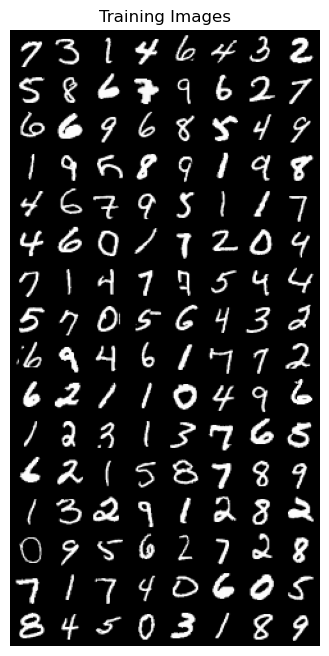

In [11]:
start = time()
dataiter = iter(dataloader)
images,labels = dataiter._next_data()
print ('Time is {} sec'.format(time()-start))

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(make_grid(images.to(device), padding=2, normalize=True).cpu(),(1,2,0)))

print('Shape of loading one batch:', images.shape)
print('Total no. of batches present in trainloader:', len(dataloader))

In [12]:
latent_dim = 100
training_params = TrainingParams(lr=0.0002, num_epochs=5, num_dis_updates=5, beta_1=0.5, batch_size=batch_size)
test_noise = get_noise(25, latent_dim)

## First I train a Wasserstein GAN

In [13]:
generator_wasserstein = GeneratorWassersteinMnist(latent_dim).apply(init_weights)
discriminator_wasserstein = DiscriminatorWassersteinMnist().apply(init_weights)
trainer_wgan = Trainer(training_params, generator_wasserstein, discriminator_wasserstein)

In [14]:
# training loop
trained_wgan = trainer_wgan.train_gan(dataloader, get_dis_loss_wasserstein, get_gen_loss_wasserstein, True, noise_dim=latent_dim)

Epoch 0 start training...
Epoch: 0/5 Steps:1/469
Epoch_Run_Time: 6.480710
Loss_C : 8.232471
Loss_G : -0.017528
Epoch: 0/5 Steps:2/469
Epoch_Run_Time: 15.212448
Loss_C : 6.771883
Loss_G : -0.018718
Epoch: 0/5 Steps:3/469
Epoch_Run_Time: 21.372315
Loss_C : 4.730876
Loss_G : -0.018637
Epoch: 0/5 Steps:4/469
Epoch_Run_Time: 27.350824
Loss_C : 2.492253
Loss_G : -0.020701
Epoch: 0/5 Steps:5/469
Epoch_Run_Time: 33.177493
Loss_C : 1.020921
Loss_G : -0.021776
Epoch: 0/5 Steps:6/469
Epoch_Run_Time: 39.924260
Loss_C : 0.410190
Loss_G : -0.022982
Epoch: 0/5 Steps:7/469
Epoch_Run_Time: 45.982898
Loss_C : 0.214285
Loss_G : -0.025365
Epoch: 0/5 Steps:8/469
Epoch_Run_Time: 51.901013
Loss_C : 0.140921
Loss_G : -0.027929
Epoch: 0/5 Steps:9/469
Epoch_Run_Time: 59.407235
Loss_C : 0.075208
Loss_G : -0.031242
Epoch: 0/5 Steps:10/469
Epoch_Run_Time: 66.401813
Loss_C : 0.011033
Loss_G : -0.036178
Epoch: 0/5 Steps:11/469
Epoch_Run_Time: 73.455279
Loss_C : -0.050202
Loss_G : -0.038540
Epoch: 0/5 Steps:12/469
Ep

KeyboardInterrupt: 

In [ ]:
# show generated images
generated_images_wasserstein = trained_wgan.generator(test_noise)
plot_tensor_images(generated_images_wasserstein, num_images=25)

In [95]:
generated_images_wasserstein

tensor([[[[0.0287, 0.0291, 0.0279,  ..., 0.0286, 0.0276, 0.0280],
          [0.0274, 0.0275, 0.0267,  ..., 0.0289, 0.0290, 0.0299],
          [0.0295, 0.0289, 0.0261,  ..., 0.0280, 0.0281, 0.0286],
          ...,
          [0.0276, 0.0283, 0.0286,  ..., 0.0310, 0.0285, 0.0297],
          [0.0299, 0.0278, 0.0288,  ..., 0.0271, 0.0279, 0.0294],
          [0.0296, 0.0273, 0.0279,  ..., 0.0276, 0.0280, 0.0296]]],


        [[[0.0283, 0.0299, 0.0295,  ..., 0.0277, 0.0282, 0.0281],
          [0.0279, 0.0291, 0.0274,  ..., 0.0308, 0.0290, 0.0301],
          [0.0286, 0.0277, 0.0265,  ..., 0.0264, 0.0286, 0.0285],
          ...,
          [0.0279, 0.0258, 0.0269,  ..., 0.0314, 0.0289, 0.0314],
          [0.0287, 0.0264, 0.0288,  ..., 0.0267, 0.0270, 0.0294],
          [0.0284, 0.0276, 0.0271,  ..., 0.0278, 0.0276, 0.0306]]],


        [[[0.0290, 0.0285, 0.0298,  ..., 0.0275, 0.0279, 0.0275],
          [0.0283, 0.0280, 0.0286,  ..., 0.0315, 0.0282, 0.0283],
          [0.0295, 0.0285, 0.0296,  ..

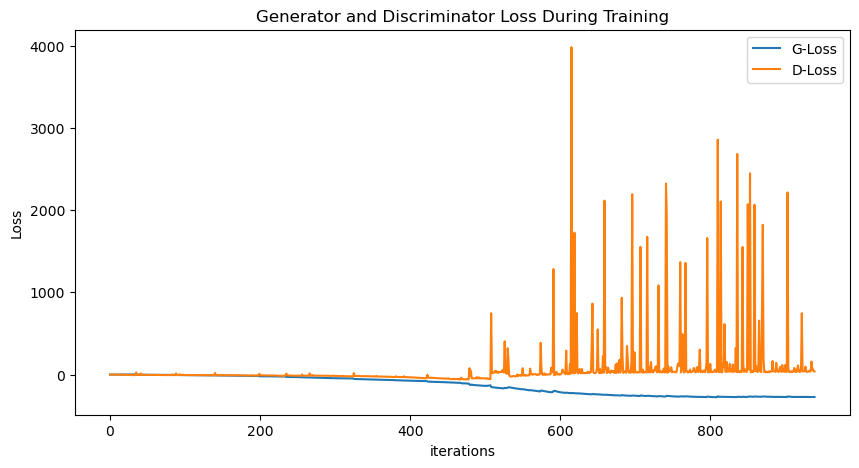

In [94]:
# plot losses
plot_losses(trained_wgan.generator_losses, trained_wgan.discriminator_losses)

## BHS Gan

In [96]:
generator_bhs = GeneratorBhsMnist(latent_dim).apply(init_weights)
discriminator_bhs = DiscriminatorBhsMnist().apply(init_weights)
trainer_bhs = Trainer(training_params, generator_bhs, discriminator_bhs)

In [97]:
# training loop
trained_bhsgan = trainer_bhs.train_gan(dataloader, get_dis_loss_bhs, get_gen_loss_bhs, False, noise_dim=latent_dim)

Epoch 0 training... done, took 359.9 seconds.
Epoch 1 training... done, took 323.7 seconds.
Epoch 2 training... done, took 324.9 seconds.
Epoch 3 training... done, took 347.6 seconds.
Epoch 4 training... done, took 368.2 seconds.
Epoch 5 training... done, took 373.0 seconds.
Epoch 6 training... done, took 401.2 seconds.
Epoch 7 training... done, took 368.3 seconds.
Epoch 8 training... done, took 361.8 seconds.
Epoch 9 training... done, took 366.1 seconds.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


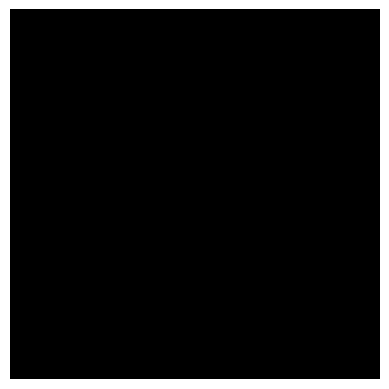

In [98]:
# show generated images
generated_images_bhs = trained_bhsgan.generator(test_noise)
plot_tensor_images(generated_images_bhs, num_images=25)

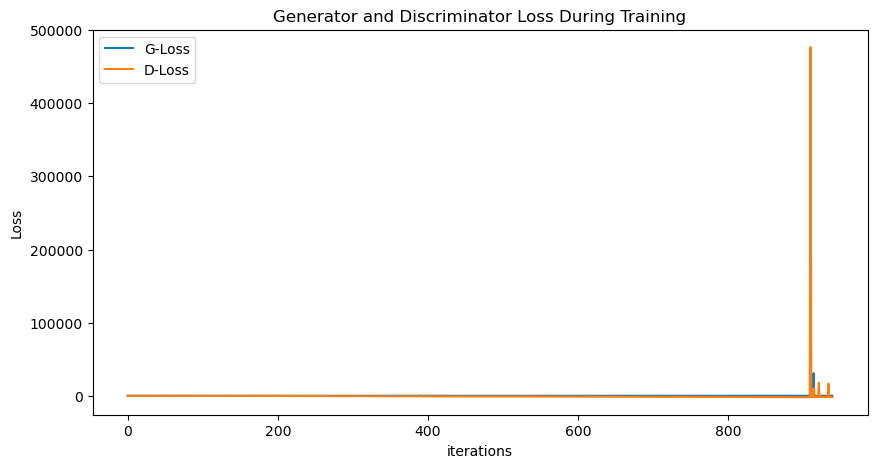

In [99]:
# plot losses
plot_losses(trained_bhsgan.generator_losses, trained_bhsgan.discriminator_losses)

## IPM BHS GAN

In [100]:
generator_ipm = GeneratorIpmMnist(latent_dim).apply(init_weights)
discriminator_ipm = DiscriminatorIpmMnist().apply(init_weights)
trainer_ipm = Trainer(training_params, generator_ipm, discriminator_ipm)

In [101]:
# training loop
trained_ipmgan = trainer_ipm.train_gan(dataloader, get_dis_loss_ipm, get_gen_loss_ipm, False, noise_dim=latent_dim)

Epoch 0 training... done, took 315.5 seconds.
Epoch 1 training... done, took 306.4 seconds.
Epoch 2 training... done, took 305.6 seconds.
Epoch 3 training... done, took 305.7 seconds.
Epoch 4 training... done, took 303.9 seconds.
Epoch 5 training... done, took 307.3 seconds.
Epoch 6 training... done, took 302.9 seconds.
Epoch 7 training... done, took 303.5 seconds.
Epoch 8 training... 

In [ ]:
# show generated images
generated_images_ipm = trained_ipmgan.generator(test_noise)
plot_tensor_images(generated_images_ipm, num_images=25)

In [ ]:
# plot losses
plot_losses(trained_ipmgan.generator_losses, trained_ipmgan.discriminator_losses)